<a href="https://colab.research.google.com/github/Yash-Jaiswal28/Deep-Learning/blob/main/Dense_SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [3]:
#Load the IMDB dataset
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

#Pad sequences to have the same length
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [5]:
#Define the RNN model
model = Sequential([
    Embedding(1000,32,input_length=100), #Embeddng layer to convert words to vectors, every word will be represented by 32 bit vector
    SimpleRNN(5,return_sequences=True),  #RNN layer with 5 units
    SimpleRNN(5),                        #Another RNN layer with 5 units
    Dense(1,activation = 'sigmoid')      #Output layer for binary classification
])

model.summary()
###
32000 - 1000*32
190 - 32*5+ 5*5 + 5
55 - 5*5 + 5*5 + 5
6 - 5*1 + 1
###

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           32000     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100, 5)            190       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 32251 (125.98 KB)
Trainable params: 32251 (125.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2

In [7]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['acc'])

In [8]:
history = model.fit(x_train, y_train, epochs = 5,batch_size =32, validation_split = 0.2)

Epoch 1/5
625/625 [==============================] - 120s 186ms/step - loss: 0.5823 - acc: 0.6927 - val_loss: 0.4932 - val_acc: 0.7778
Epoch 2/5
625/625 [==============================] - 96s 153ms/step - loss: 0.4553 - acc: 0.8005 - val_loss: 0.4621 - val_acc: 0.7928
Epoch 3/5
625/625 [==============================] - 92s 147ms/step - loss: 0.4251 - acc: 0.8166 - val_loss: 0.4540 - val_acc: 0.7976
Epoch 4/5
625/625 [==============================] - 93s 149ms/step - loss: 0.3940 - acc: 0.8352 - val_loss: 0.4703 - val_acc: 0.7936
Epoch 5/5
625/625 [==============================] - 93s 149ms/step - loss: 0.3786 - acc: 0.8397 - val_loss: 0.4593 - val_acc: 0.7942


In [9]:
import matplotlib.pyplot as plt

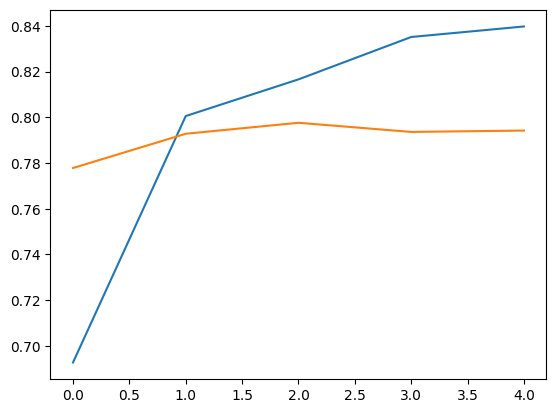

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])